https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Expectation-Maximization

In [1]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html
# Compute minimum distances between one point and a set of points.
from sklearn.metrics import pairwise_distances_argmin

In [2]:
number_of_clusters=4
X, y_true = make_blobs(n_samples=300, centers=number_of_clusters,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(number_of_clusters, 2)

In [3]:
def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(number_of_clusters), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

initial centers
[[ 0.49671415  3.8617357 ]
 [ 0.64768854  5.52302986]
 [-0.23415337  3.76586304]
 [ 1.57921282  4.76743473]]
centers 0
[[ 1.61788404  1.73021643]
 [-1.05544832  7.31289   ]
 [-1.53049092  2.89441674]
 [ 1.58028607  4.4210127 ]]
centers 1
[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.57084703  2.85535402]
 [ 0.97007666  4.41532732]]
centers 2
[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


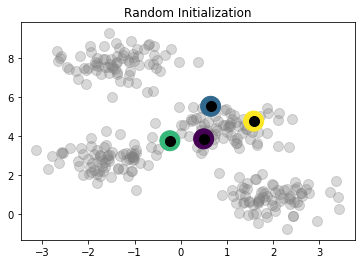

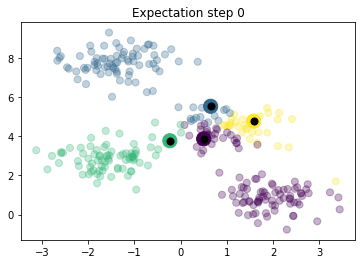

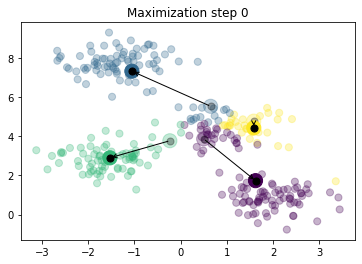

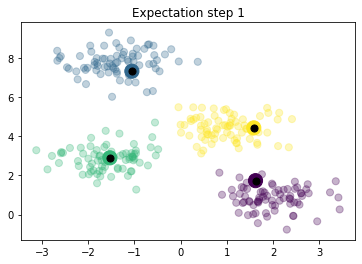

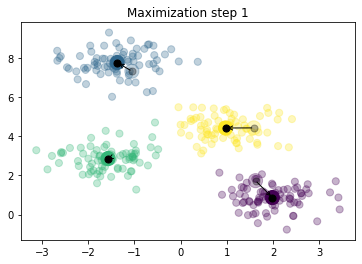

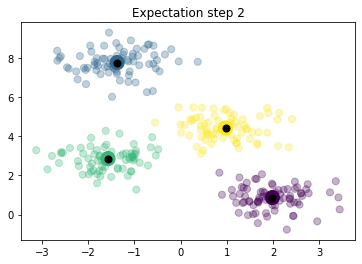

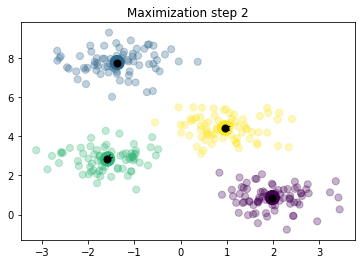

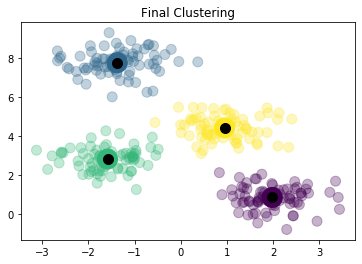

In [4]:
fig = plt.figure()
ax = plt.gca()
draw_points(ax, 'gray', factor=2)
draw_centers(ax, centers, factor=2)
print("initial centers")
print(centers)
plt.title('Random Initialization')

for indx in range(3):    
    # E-step
    fig = plt.figure()
    ax = plt.gca()
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax, y_pred)
    draw_centers(ax, centers)
    plt.title('Expectation step '+str(indx))
    
    # M-step
    fig = plt.figure()
    ax = plt.gca()
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(number_of_clusters)])
    # where the centers are:
    print("centers "+str(indx))
    print(new_centers)
    draw_points(ax, y_pred)
    draw_centers(ax, centers, alpha=0.3)
    draw_centers(ax, new_centers)
    for loop_index in range(number_of_clusters):
        ax.annotate('', new_centers[loop_index], centers[loop_index],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
    plt.title('Maximization step '+str(indx))
    
    # Finish iteration
    centers = new_centers

# Final E-step    
fig = plt.figure()
ax = plt.gca()
y_pred = pairwise_distances_argmin(X, centers)
draw_points(ax, y_pred, factor=2)
draw_centers(ax, centers, factor=2)
_=plt.title("Final Clustering")